In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Meiryo"
import numpy as np
import scipy
import statsmodels.api as sm

In [2]:
#データの読み込みと前処理
df = pd.read_csv("data/SSDSE-D-2021.csv", encoding="cp932", skiprows=1)
df = df.query("男女の別 =='0_総数' and 都道府県 != '全国'")
df = df[["都道府県","推定人口（10歳以上）"]]
df.head()

,都道府県,推定人口（10歳以上）
1,北海道,4756
2,青森県,1152
3,岩手県,1135
4,宮城県,2091
5,秋田県,906


In [21]:
n = 10000
trial = 3
dice_num = 6
result = np.array([])

for i in range(n):
    dices = np.zeros(trial)
    for dice in range(trial):
        x = np.random.randint(1,dice_num+1)
        dices[dice] = x
    dice_res = dices.sum()
    result = np.append(result, dice_res)

result

array([15., 10., 14., ..., 13.,  9.,  8.])

平均値:10.5312
中央値:11.0
分散:8.71882656


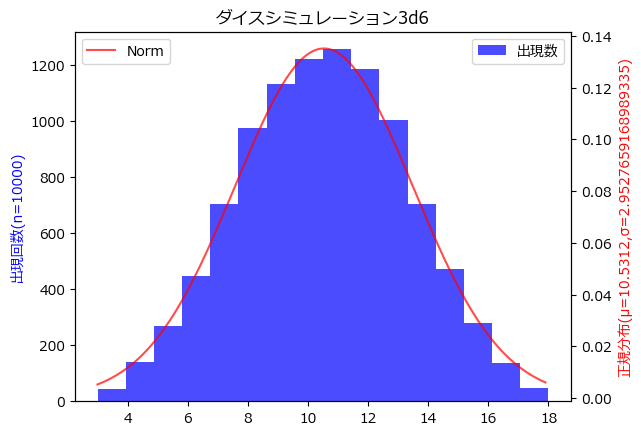

In [29]:
x = np.arange(trial,dice_num*trial,0.1)
y = scipy.stats.norm.pdf(x,result.mean(), result.std(ddof=1))
print(f"平均値:{np.mean(result)}")
print(f"中央値:{np.median(result)}")
print(f"分散:{np.var(result)}")
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.hist(result,bins=np.count_nonzero(np.unique(result)), label="出現数", alpha=0.7, color='blue')
ax2.plot(x,y,label="Norm", alpha=0.7, color='red')
ax1.legend(loc="upper right")
ax2.legend(loc="upper left")
ax1.set_ylabel(f'出現回数(n={n})', color='blue')
ax2.set_ylabel(f'正規分布(μ={result.mean()},σ={result.std(ddof=0)})', color='red')
plt.title(f"ダイスシミュレーション{trial}d{dice_num}")
plt.show()

In [18]:
np.count_nonzero(np.unique(result))

16